<h1 style="text-align:center">Introduction to the Fast Fourier Transform (FFT)</h1>
<h2 style="text-align:center">MCHE 485: Mechanical Vibrations</h2>
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu\">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/</p>

This notebook will introduce the [Fast Fourier Tranform](https://en.wikipedia.org/wiki/Fast_Fourier_transform), or FFT. The FFT is a computationally efficient implementation of the [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). The goal is not a complete understanding of the transformation, but an introduction to how to use it and what information it can provide about a signal. In our class, the signal of interest is typically the vibratory response of a system, but the FFT also has *wide* application outside of vibration analysis.

In [1]:
# Grab all of the NumPy functions with namespace (nickname) np
import numpy as np              

In [2]:
# Set up the notebook to display plots inline
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

Let's begin by looking at a signal that we would like to later determine the components of. In this case, we'll use a sum of three sines with different amplitudes and frequencies.

In [3]:
t = np.linspace(0, 5, 5001)   # Time, 0-5s with 5001 samples in the range

# Define the frequency and amplitude of the three components of the signal
A1 = 1.0                  # amplitude of first sine
w1 = 1.0 * (2 * np.pi)    # frequency of first sine (rad/s)
A2 = 0.5                  # amplitude of second sine
w2 = 2.75 * (2 * np.pi)   # frequency of second sine (rad/s)
A3 = 1.5                  # amplitude of third sine
w3 = 7.5 * (2 * np.pi)    # frequency of third sine (rad/s)

orig_signal = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

Let's plot the signal to see what it looks like.

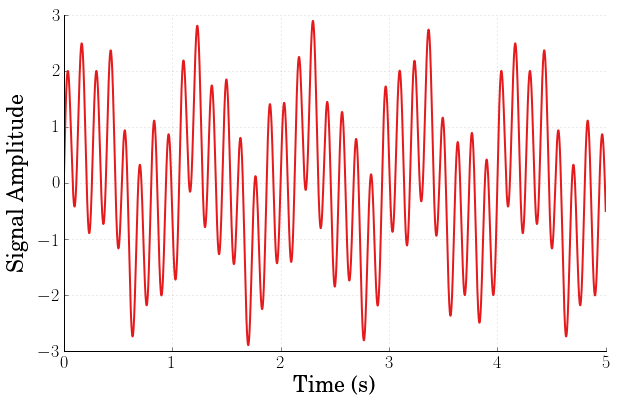

In [4]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Signal Amplitude', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, orig_signal, linewidth=2, linestyle='-', label=r'Original Signal')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('OriginalSignal.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

I've written a function for my lab that takes care of a lot of the boilerplate code necessary to complete and plot the FFT. The function, defined in the next cell, is named ```CRAWLAB_fft```. It relies on the ```fft``` function from the ```fftpack``` module of SciPy.

The function recenters data about zero, applies a Hanning window to the data, and selects the real-valued components returned from the SciPy ```fft``` function. If ```plotflag``` is ```True```, then it will also automatically generate the plot of the FFT magnitude. Reasons for doing these things are a bit beyond this tutorial, so, for now, you can just think of ```CRAWLAB_fft``` as implementing the FFT algorithm for you.

In [5]:
def CRAWLAB_fft(data, time, plotflag):
    ''' Function to get the FFT for a response
    #
    # Inputs:
    #   time = time array corresponding to the data
    #   data = the response data array (only pass a single dimension/state at at time)
    #   plotflag = will plot the FFT if nonzero
    #   
    # Output:
    #   fft_freq = an array of the freqs used in the FFT
    #   fft_mag = an array of the amplitude of the FFT at each freq in fft_freq
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    ######################################################################################
    '''
    
    from scipy.fftpack import fft
    
    # correct for any DC offset
    offset = np.mean(data) 

    # Get the sampling time
    sample_time = time[1] - time[0]
    
    # Get the length of the dataset
    n = len(data)

    # Calculate the FFT of the data, removing the offset and using a Hanning Window
    fft_mag = fft((data - offset) * np.hanning(len(data)))
    
    # Define the frequency range of the output
    fft_freq = np.linspace(0.0, 1.0 / (2.0*sample_time), int(np.ceil(n/2)))
    
    # Only return the "useful" part of the fft
    fft_mag = 2.0/n * np.abs(fft_mag[0:int(np.ceil(n/2))])
    
    # If plotflag is nonzero (True), plot the FFT before returning the magnitude and phase
    if plotflag:
        # Plot the relationshiop
        #   Many of these setting could also be made default by the .matplotlibrc file
        fig = plt.figure(figsize=(6,4))
        ax = plt.gca()
        plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
        plt.setp(ax.get_ymajorticklabels(),fontsize=18)
        plt.setp(ax.get_xmajorticklabels(),fontsize=18)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.grid(True, linestyle=':', color='0.75')
        ax.set_axisbelow(True)

        plt.xlabel('Frequency (Hz)', fontsize=22, labelpad=8)
        plt.ylabel('FFT magnitude', fontsize=22, labelpad=10)
    
        plt.plot(fft_freq, fft_mag, linewidth=2, linestyle='-')
        
        # Adjust the page layout filling the page using the new tight_layout command
        plt.tight_layout(pad=0.5)
        plt.show()
    
    return fft_freq, fft_mag

In [6]:
# We can also use the FFT to get the natrual frequency
freq, mag = CRAWLAB_fft(orig_signal, t, False)

Let's plot the FFT manually so that we can scale the axes to our liking.

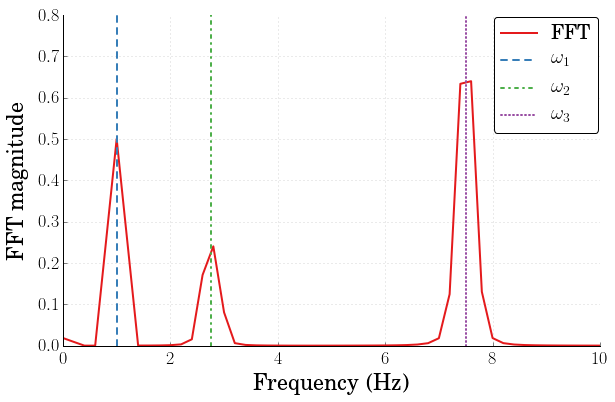

In [7]:
# Plot the relationshiop
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frequency (Hz)',fontsize=22,labelpad=8)
plt.ylabel('FFT magnitude',fontsize=22,labelpad=10)


plt.plot(freq, mag, linewidth=2, linestyle='-', label = 'FFT')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.25 * np.max(mag))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude_5s.pdf',dpi=600)

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Here, we notice that the FFT has peaks at each of the frequencies that we used to build the original signal. It is telling us the main frequency content of that original signal, that it is made of harmonic components with frequencies of $\omega_1$, $\omega_2$, and $\omega_3$. The relative amplitudes of the peaks also gives us information about the relative contribution of each of the harmonic signal at each frequency. Notice that they have approximately the same ratio of $A_1$, $A_2$, and $A_3$.

However, notice that the peaks are not perfect. We can improve the resolution of the FFT by sampling the data for a longer amount of time. Let's try that and see how the FFT plot changes.

We defined our signal over 5s before. Now, let's define it over 25s. We'll leave the total number of samples the same (so, our samples per second is actually lower than the first time).

In [8]:
t = np.linspace(0, 25, 5001)   # Time, 0-5s with 5001 samples in the range

# Now, define the 25s signal, using the same amplitudes and frequencies as the 5s version
orig_signal_25s = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

In [9]:
# Calculate the FFT for the 25s signal
freq_25s, mag_25s = CRAWLAB_fft(orig_signal_25s, t, False)

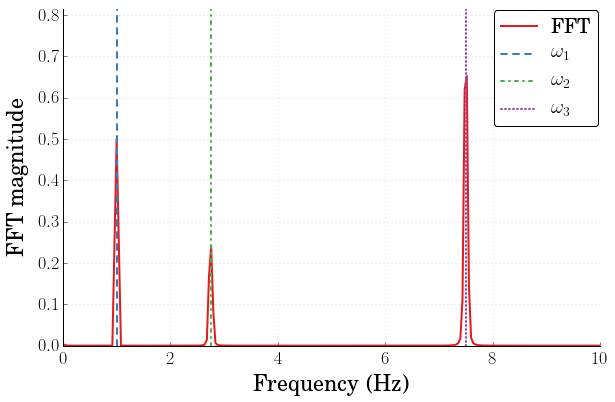

In [10]:
# Plot the relationshiop
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frequency (Hz)', fontsize=22, labelpad=8)
plt.ylabel('FFT magnitude', fontsize=22, labelpad=10)


plt.plot(freq_25s, mag_25s, linewidth=2, linestyle='-', label = 'FFT')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.25 * np.max(mag_25s))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude.pdf',dpi=600)

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Notice that the peaks are much narrower now. The resolution of our results has improved, because we sampled the signal for a longer total duration.

Now, let's add some noise to the signal to simulate sampling "real world" data. All sensors will have some noise associated with them. We'll use the 25 second version of the signal and add random noise.

In [11]:
noisy_signal = orig_signal_25s +  np.random.randn(len(orig_signal_25s))

Let's plot the original signal and the one with noise added to compare. We'll only plot 3 seconds to make the differnces visible.

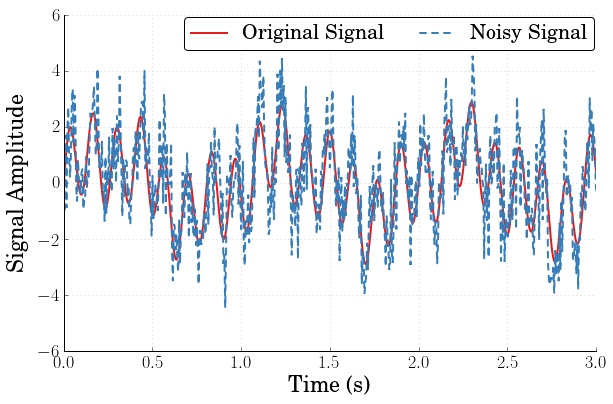

In [12]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Signal Amplitude', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, orig_signal_25s, linewidth=2, linestyle='-', label=r'Original Signal')
plt.plot(t, noisy_signal, linewidth=2, linestyle='--', label=r'Noisy Signal')

# uncomment below and set limits if needed
plt.xlim(0, 3)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('OriginalSignal.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Now, we'll repeat the FFT analysis on this noisy signal and compare it to the "pure" version we calculated before.

In [13]:
# Calculate the FFT for the noisy 25s signal
freq_noisy, mag_noisy = CRAWLAB_fft(noisy_signal, t, False)

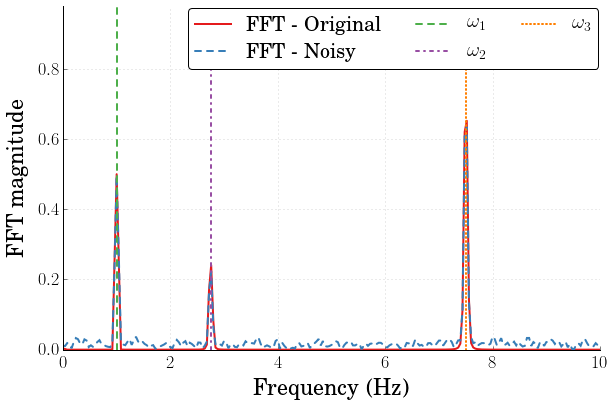

In [14]:
# Plot the relationshiop
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frequency (Hz)', fontsize=22, labelpad=8)
plt.ylabel('FFT magnitude', fontsize=22, labelpad=10)


plt.plot(freq_25s, mag_25s, linewidth=2, linestyle='-', label = 'FFT - Original')
plt.plot(freq_noisy, mag_noisy, linewidth=2, linestyle='--', label = 'FFT - Noisy')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.5 * np.max(mag_25s))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude.pdf',dpi=600)

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Now that the signal has some noise, the FFT doesn't produce nearly as "clean" as result. However, we still do see peaks near the three frequencies we used to generate the original signal. This is the *magic* of the FFT; it provides us with the frequency content of the signal being processed. For vibratory systems in free-vibration, that allows us to identify natural frequencies of the system.

To help yourself understand better, go back throught his notebook and change the values of $\omega_1$, $\omega_2$, $\omega_3$, $A_1$, $A_2$, and $A_3$ and observe the changes in the FFT results. The peaks in the FFT should follow your changes.

If you'd like to explore the FFT further, the tutorials below and the links referenced within them have much more information:

* [Understanding the FFT Algorithm][0-3]
* [The Math Trick Behind MP3s, JPEGs, and Homer Simpson’s Face][0-4]
* [NI FFT Fundamentals][0-1]
* [SciPy Lectures Notes FFT][0-5]
* [Fourier transform for dummies][0-2]

[0-1]: http://zone.ni.com/reference/en-XX/help/372416B-01/svtconcepts/fft_funda/ "FFT Fundamentals (Sound and Vibration Measurement Suite) - Sound and Vibration Measurement Suite 7.0 Help - National Instruments"
[0-2]: http://nipunbatra.github.io/2016/01/fft/ "Fourier transform for dummies | Nipun Batra |"
[0-3]: http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/ "Understanding the FFT Algorithm"
[0-4]: http://nautil.us/blog/the-math-trick-behind-mp3s-jpegs-and-homer-simpsons-face "The Math Trick Behind MP3s, JPEGs, and Homer Simpson’s Face - Facts So Romantic - Nautilus"
[0-5]: http://www.scipy-lectures.org/intro/scipy.html#fast-fourier-transforms-scipy-fftpack "1.5. Scipy : high-level scientific computing — Scipy lecture notes"

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.


In [15]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())